https://www.kaggle.com/datasets/lakshmanarajak/yoga-dataset

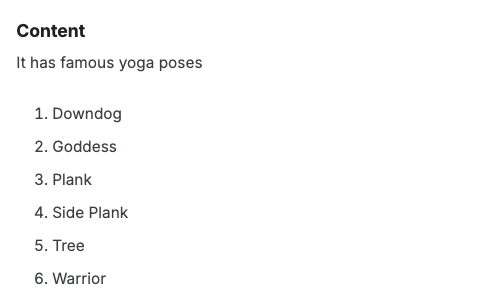

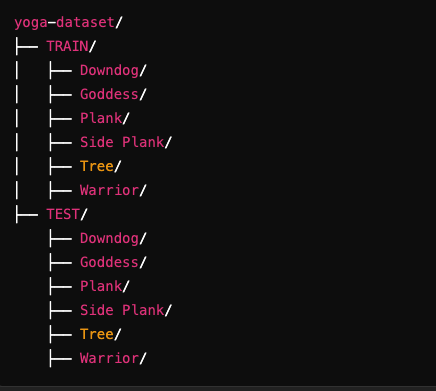

In [1]:
import IPython
import sys

def clean_notebook():
    IPython.display.clear_output(wait=True)
    print("Notebook cleaned.")

!pip install opendatasets
!pip install kaggle


# Clean up the notebook
clean_notebook()


Notebook cleaned.


In [2]:
import opendatasets as od
od.download("https://www.kaggle.com/lakshmanarajak/yoga-dataset")


Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:

  tuchsanai


Your Kaggle Key:

  ········


Dataset URL: https://www.kaggle.com/datasets/lakshmanarajak/yoga-dataset


100%|██████████| 187M/187M [00:10<00:00, 18.8MB/s] 


In [28]:
import os

def create_image_label_lists(data_dir, split):
    image_paths = []
    labels = []
    
    split_dir = os.path.join(data_dir, split)
    classes = sorted(os.listdir(split_dir))  # Sorting to maintain consistent label order
    
    for class_name in classes:
        class_path = os.path.join(split_dir, class_name)
        if os.path.isdir(class_path):
            for image_name in os.listdir(class_path):
                image_path = os.path.join(class_path, image_name)
                if os.path.isfile(image_path):
                    image_paths.append(image_path)
                    labels.append(class_name)  # Using folder name as the label
    
    return image_paths, labels


data_directory =  "/workspace/code/week06/Homework/yoga-dataset/DATASET"
train_image_paths, train_labels = create_image_label_lists(data_directory, "TRAIN")
test_image_paths, test_labels = create_image_label_lists(data_directory, "TEST")

# Verify dataset lists
print(f"Train dataset size: {len(train_image_paths)}")
print(f"Test dataset size: {len(test_image_paths)}")
print("\n")

# Example output
print("Sample train image paths:", train_image_paths[:2])
print("\n")
print("Sample train labels:", train_labels[:2])


Train dataset size: 752
Test dataset size: 419


Sample train image paths: ['/workspace/code/week06/Homework/yoga-dataset/DATASET/TRAIN/Downdog/00000161.jpg', '/workspace/code/week06/Homework/yoga-dataset/DATASET/TRAIN/Downdog/00000138.jpg']


Sample train labels: ['Downdog', 'Downdog']


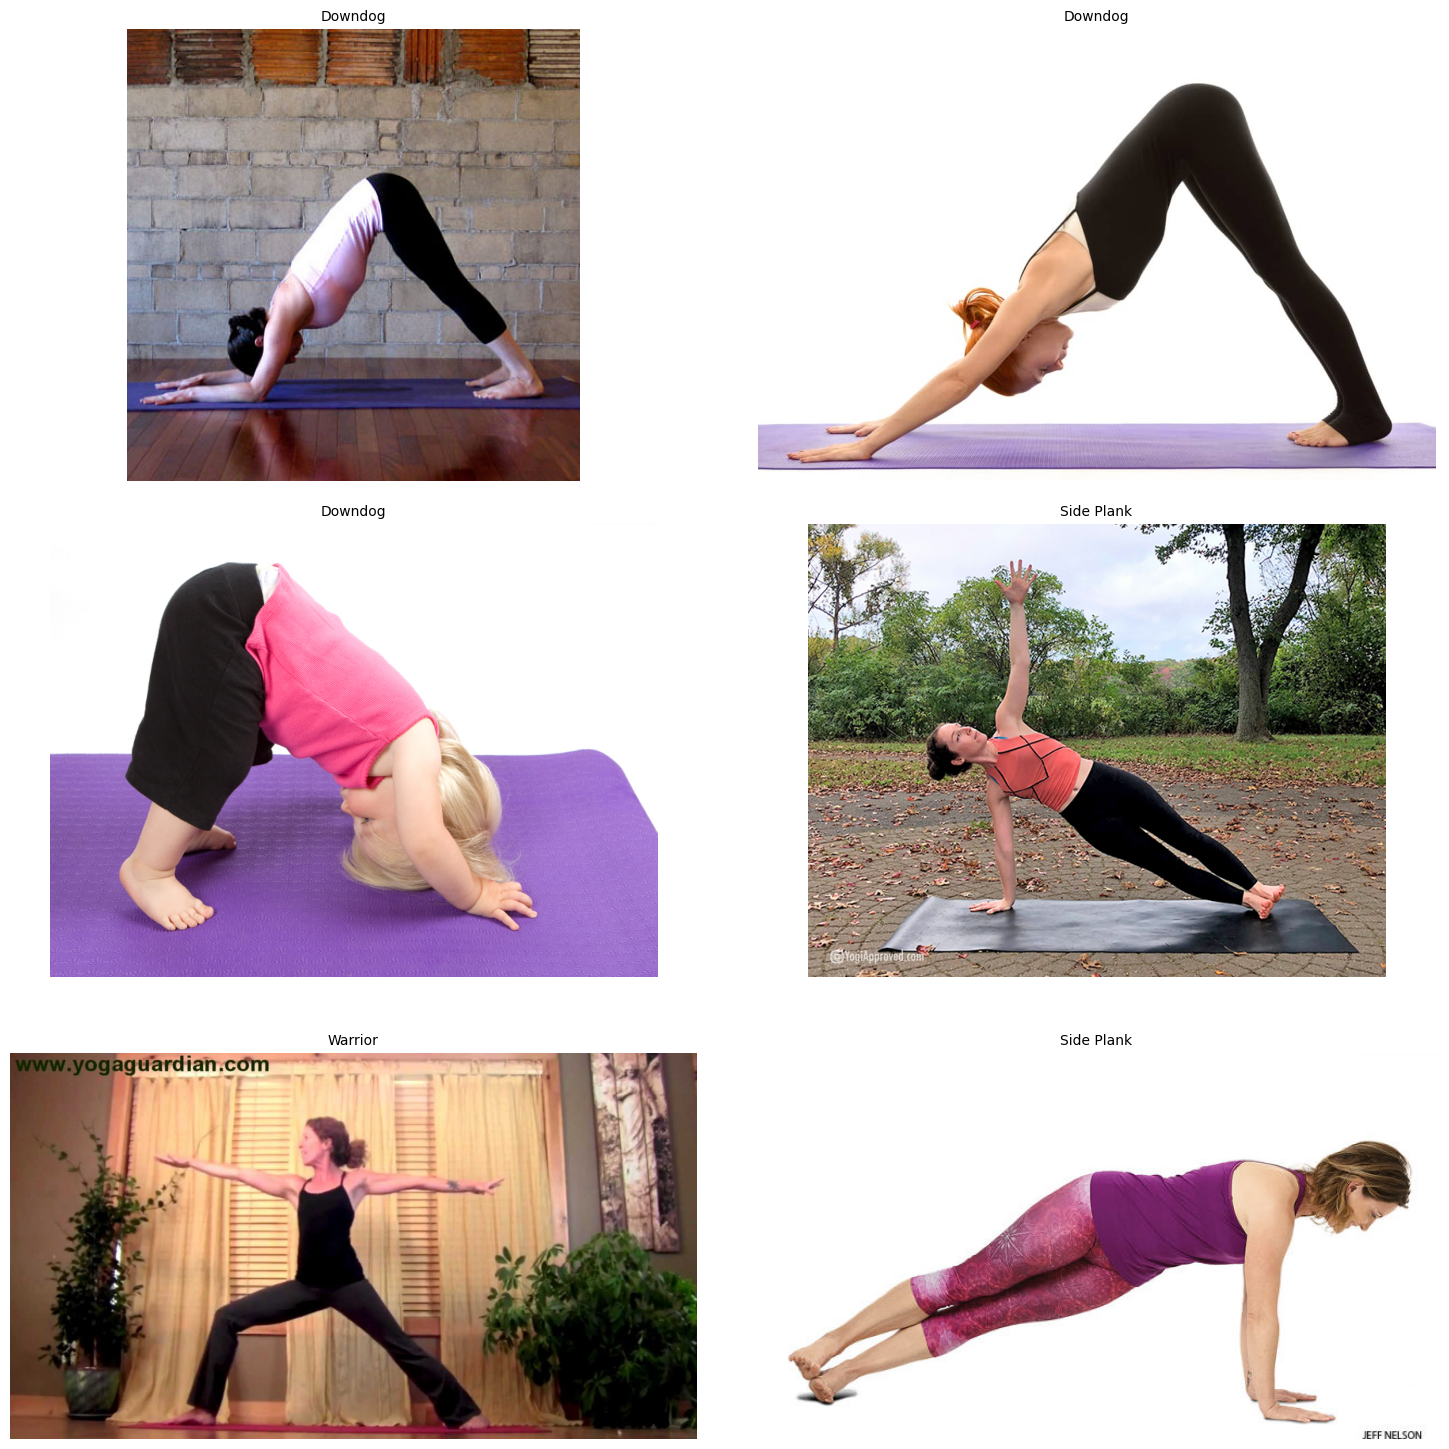

In [35]:
import random 
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Display random samples in a 5x5 grid
def display_random_samples(image_paths, labels, grid_size=(3, 2)):
    sample_indices = random.sample(range(len(image_paths)), grid_size[0] * grid_size[1])
    
    fig, axes = plt.subplots(grid_size[0], grid_size[1], figsize=(15, 15))
    fig.tight_layout(pad=1.0)
    
    for idx, ax in zip(sample_indices, axes.flatten()):
        img = mpimg.imread(image_paths[idx])
        ax.imshow(img)
        ax.set_title(labels[idx], fontsize=10)
        ax.axis("off")
    
    plt.show()


display_random_samples(train_image_paths, train_labels)